In [1]:
#import libraries, datasets
import pandas as pd
energy_price_pd = pd.read_csv("../data/energy_prices.csv")
nuclear_energy_interest_pd = pd.read_csv("../data/nuclear_energy_interest.csv", skiprows=2)
print(energy_price_pd.head())
print(nuclear_energy_interest_pd.head())


  observation_date  APU000072610
0       2004-01-01         0.091
1       2004-02-01         0.091
2       2004-03-01         0.091
3       2004-04-01         0.091
4       2004-05-01         0.093
     Month  nuclear energy: (United States)
0  2004-01                               45
1  2004-02                               52
2  2004-03                               51
3  2004-04                               64
4  2004-05                               56


In [2]:
#standardize columns
energy_price_pd['observation_date'] = pd.to_datetime(energy_price_pd['observation_date'])
energy_price_pd = energy_price_pd.rename(columns={'observation_date' : 'Date', 'APU000072610' : 'Price_per_KWh'})

nuclear_energy_interest_pd = nuclear_energy_interest_pd.rename(columns={'Month':'Date' , 'nuclear energy: (United States)':'Nuclear Energy Interest'})
nuclear_energy_interest_pd['Date']= pd.to_datetime(nuclear_energy_interest_pd['Date'])
print(energy_price_pd.head())
print(nuclear_energy_interest_pd.head())

        Date  Price_per_KWh
0 2004-01-01          0.091
1 2004-02-01          0.091
2 2004-03-01          0.091
3 2004-04-01          0.091
4 2004-05-01          0.093
        Date  Nuclear Energy Interest
0 2004-01-01                       45
1 2004-02-01                       52
2 2004-03-01                       51
3 2004-04-01                       64
4 2004-05-01                       56


In [3]:
#truncate day
nuclear_energy_interest_pd['Date'] = nuclear_energy_interest_pd['Date'].dt.to_period('M')
energy_price_pd['Date'] = energy_price_pd['Date'].dt.to_period('M')
print(energy_price_pd.head())
print(energy_price_pd.head())

      Date  Price_per_KWh
0  2004-01          0.091
1  2004-02          0.091
2  2004-03          0.091
3  2004-04          0.091
4  2004-05          0.093
      Date  Price_per_KWh
0  2004-01          0.091
1  2004-02          0.091
2  2004-03          0.091
3  2004-04          0.091
4  2004-05          0.093


In [4]:
#summaries
print(energy_price_pd.value_counts())
print(nuclear_energy_interest_pd.value_counts())

Date     Price_per_KWh
2004-01  0.091            1
2004-02  0.091            1
2004-03  0.091            1
2004-04  0.091            1
2004-05  0.093            1
                         ..
2025-05  0.182            1
2025-06  0.190            1
2025-07  0.189            1
2025-08  0.190            1
2025-09  0.188            1
Name: count, Length: 261, dtype: int64
Date     Nuclear Energy Interest
2004-01  45                         1
2004-02  52                         1
2004-03  51                         1
2004-04  64                         1
2004-05  56                         1
                                   ..
2025-06  37                         1
2025-07  29                         1
2025-08  29                         1
2025-09  48                         1
2025-10  50                         1
Name: count, Length: 262, dtype: int64


In [5]:
#remove last month of nuclear interest
nuclear_energy_interest_pd = nuclear_energy_interest_pd.iloc[:-1]
print(nuclear_energy_interest_pd.value_counts())

Date     Nuclear Energy Interest
2004-01  45                         1
2004-02  52                         1
2004-03  51                         1
2004-04  64                         1
2004-05  56                         1
                                   ..
2025-05  56                         1
2025-06  37                         1
2025-07  29                         1
2025-08  29                         1
2025-09  48                         1
Name: count, Length: 261, dtype: int64


In [6]:
#merging the datasets
master_df = pd.merge(
    energy_price_pd,
    nuclear_energy_interest_pd,
    on='Date',
    how='inner'
)
master_df = master_df.set_index('Date')
master_df.index = master_df.index.to_timestamp()
print(master_df.head())
print(master_df.tail())
master_df.info()

            Price_per_KWh  Nuclear Energy Interest
Date                                              
2004-01-01          0.091                       45
2004-02-01          0.091                       52
2004-03-01          0.091                       51
2004-04-01          0.091                       64
2004-05-01          0.093                       56
            Price_per_KWh  Nuclear Energy Interest
Date                                              
2025-05-01          0.182                       56
2025-06-01          0.190                       37
2025-07-01          0.189                       29
2025-08-01          0.190                       29
2025-09-01          0.188                       48
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2004-01-01 to 2025-09-01
Freq: MS
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price_per_KWh            261 non-null    

In [7]:
#check for bad values
master_df['Price_per_KWh'] = pd.to_numeric(master_df['Price_per_KWh'], errors='coerce')
master_df['Nuclear Energy Interest'] = pd.to_numeric(master_df['Nuclear Energy Interest'], errors='coerce')

print(master_df.isna().sum())


Price_per_KWh              0
Nuclear Energy Interest    0
dtype: int64


In [8]:
#add fukishima intervention date
intervention_date = '2011-03'
master_df['Fukishima_Bool'] = (master_df.index > intervention_date).astype(int)
print(master_df.head())
print(master_df.tail())

            Price_per_KWh  Nuclear Energy Interest  Fukishima_Bool
Date                                                              
2004-01-01          0.091                       45               0
2004-02-01          0.091                       52               0
2004-03-01          0.091                       51               0
2004-04-01          0.091                       64               0
2004-05-01          0.093                       56               0
            Price_per_KWh  Nuclear Energy Interest  Fukishima_Bool
Date                                                              
2025-05-01          0.182                       56               1
2025-06-01          0.190                       37               1
2025-07-01          0.189                       29               1
2025-08-01          0.190                       29               1
2025-09-01          0.188                       48               1


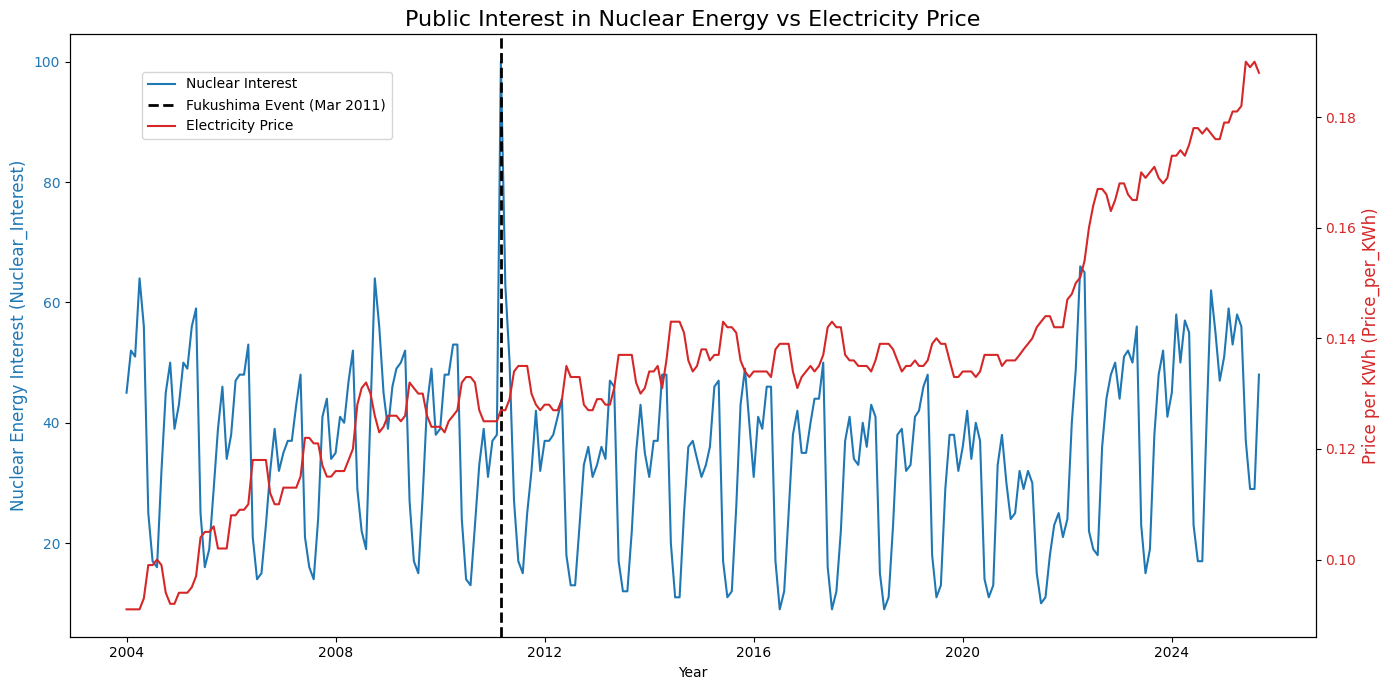

In [9]:
#Visualizations
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(14,7)) #width, height in inches

#Nuclear Interest (left axis)
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Nuclear Energy Interest (Nuclear_Interest)', color=color, fontsize=12)
ax1.plot(master_df.index, master_df['Nuclear Energy Interest'], color=color, label = 'Nuclear Interest')
ax1.tick_params(axis='y', labelcolor=color)

#Electricity Price (right axis)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Price per KWh (Price_per_KWh)', color=color, fontsize=12)
ax2.plot(master_df.index, master_df['Price_per_KWh'], color=color, label = "Electricity Price")
ax2.tick_params(axis='y', labelcolor=color)

#Fukishima Intervention Line
fukishima_timestamp = pd.to_datetime(intervention_date)
ax1.axvline(x=fukishima_timestamp, color='black', linestyle='--', linewidth=2, label='Fukushima Event (Mar 2011)')

#General graph additions
ax1.set_title('Public Interest in Nuclear Energy vs Electricity Price', fontsize=16)
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
fig.tight_layout()

plt.show()

Noticed high seasonality in nuclear interest, along with non-stationarity in energy prices (will need Augmented Dickey Fuller Test)

In [10]:
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

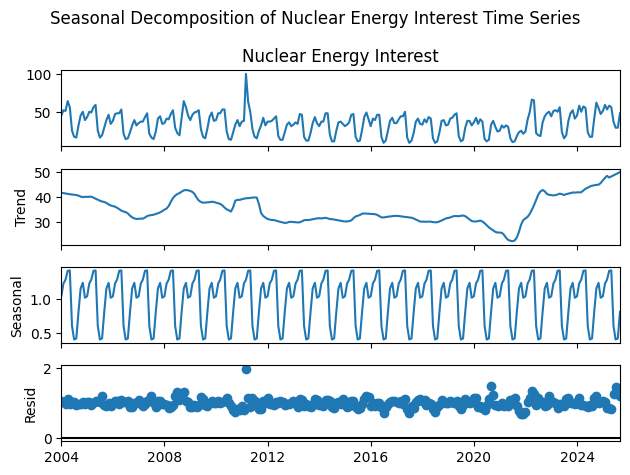

In [11]:
#Data decomposition
nuclear_result = seasonal_decompose(master_df['Nuclear Energy Interest'], model='multiplicative', extrapolate_trend='freq', period=12)
nuclear_result.plot()
plt.suptitle('Seasonal Decomposition of Nuclear Energy Interest Time Series')
plt.tight_layout()
plt.show()


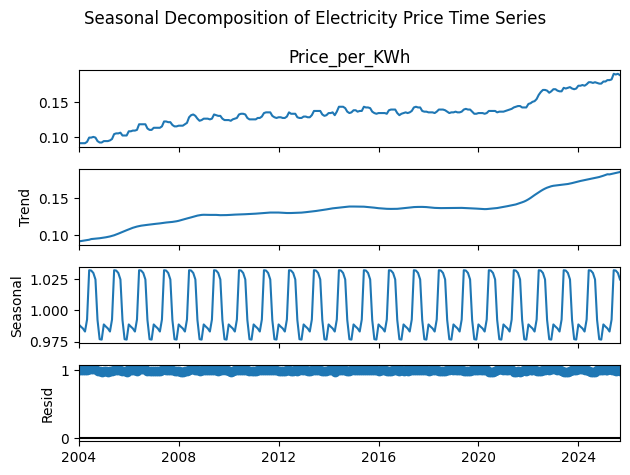

In [12]:
energy_result = seasonal_decompose(master_df['Price_per_KWh'], model='multiplicative', extrapolate_trend='freq', period=12)
energy_result.plot()
plt.suptitle('Seasonal Decomposition of Electricity Price Time Series')
plt.tight_layout()
plt.show()

Insignificant seasonality observed in the Electricity Price Time Series
Now remove Nuclear Interest Seasonality (d(t) = y(t) - y(t - m))

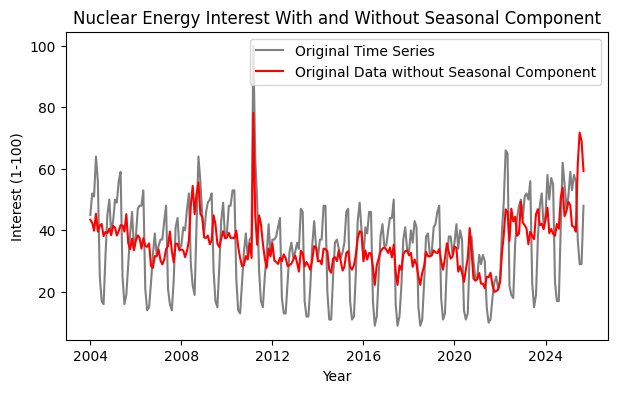

In [ ]:
#Removing seasonality
#nuclear_result = seasonal_decompose(master_df['Nuclear Energy Interest'], model='multiplicative', extrapolate_trend='freq', period=12)
# Plotting the original data and original data without the seasonal component
plt.figure(figsize=(7, 4))

# Plot the original time series data
plt.plot(master_df['Nuclear Energy Interest'], label='Original Time Series', color='grey')
data_without_seasonal = master_df['Nuclear Energy Interest'] / nuclear_result.seasonal

# Plot the original data without the seasonal component
plt.plot(data_without_seasonal,
         label='Original Data without Seasonal Component', color='red')
plt.title('Nuclear Energy Interest With and Without Seasonal Component')
plt.xlabel('Year')
plt.ylabel('Interest (1-100)')
plt.legend()
plt.show()

Applying Augmented Dickey Fuller to check for stationarity

In [18]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(data_without_seasonal)

print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

ADF Statistic: -3.2569002612682416
p-value: 0.016918445275605147


p<0.5 so the Nuclear Interest time series is stationary. Now repeat for Energy

In [19]:
energy_data_without_seasonal = master_df['Price_per_KWh'] / energy_result.seasonal
adf_result = adfuller(energy_data_without_seasonal)

print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

ADF Statistic: -0.0999925724899119
p-value: 0.9494392732990183


Energy series is not stationary, proceed by differencing the data

In [21]:
data_diff = energy_data_without_seasonal.diff().dropna()
adf_result = adfuller(data_diff)

print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

ADF Statistic: -3.1184702182103217
p-value: 0.025216163320107354


p<0.05 Energy Time Series is now stationary

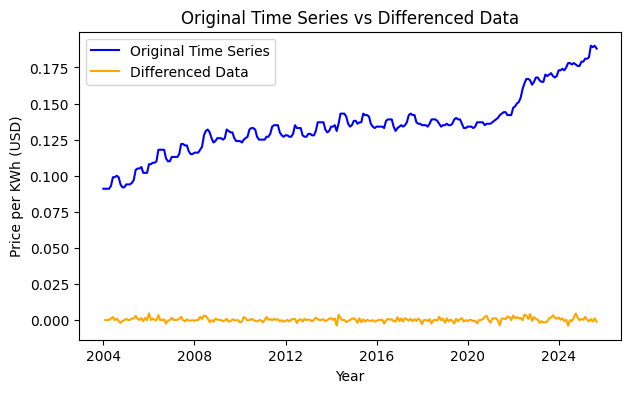

In [24]:
#Visualize adjustments to Energy Time Series
plt.figure(figsize=(7, 4))

plt.plot(master_df['Price_per_KWh'], label='Original Time Series', color='blue')
plt.plot(data_diff, label='Differenced Data', color='orange')
plt.title('Original Time Series vs Differenced Data')
plt.xlabel('Year')
plt.ylabel('Price per KWh (USD)')
plt.legend()
plt.show()

In [26]:
#check lengths of time series
price_stationary = data_diff
interest_stationary = data_without_seasonal
print(f"Energy data length: {len(price_stationary)}")
print(f"Interest data length: {len(interest_stationary)}")
print(f"Fukushima_Bool lenth: {len(master_df['Fukishima_Bool'])}")

Energy data length: 260
Interest data length: 261
Fukushima_Bool lenth: 261


In [28]:
#align dataframes to index of energy series (shortest)
interest_stationary = interest_stationary.loc[price_stationary.index]
fukushima_adjusted = master_df['Fukishima_Bool'].loc[price_stationary.index]

print(f"Energy data length: {len(price_stationary)}")
print(f"Interest data length: {len(interest_stationary)}")
print(f"Fukushima_Bool lenth: {len(fukushima_adjusted)}")


Energy data length: 260
Interest data length: 260
Fukushima_Bool lenth: 260


Now to perform OLS regression

In [29]:
import statsmodels.api as sm

Y = interest_stationary

X = pd.DataFrame({
    'Price_Change': price_stationary,
    'Fukushima_Dummy': fukushima_adjusted
})

X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     11.53
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.60e-05
Time:                        10:45:58   Log-Likelihood:                -903.20
No. Observations:                 260   AIC:                             1812.
Df Residuals:                     257   BIC:                             1823.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              37.3714      0.861     